In [1]:
import os, shutil

In [8]:
train_dir = 'data/chest_xray/train'
train_norm = 'data/chest_xray/train/NORMAL'
train_pneu = 'data/chest_xray/train/PNEUMONIA'
test_dir = 'data/chest_xray/test'
test_norm = 'data/chest_xray/test/NORMAL'
test_pneu = 'data/chest_xray/test/PNEUMONIA'
val_dir = 'data/chest_xray/val'
val_norm = 'data/chest_xray/val/NORMAL'
val_pneu = 'data/chest_xray/val/PNEUMONIA'

In [9]:
imgs_train_norm = [file for file in os.listdir(train_norm) if file.endswith('.jpeg')]
imgs_train_pneu = [file for file in os.listdir(train_pneu) if file.endswith('.jpeg')]

imgs_test_norm = [file for file in os.listdir(test_norm) if file.endswith('.jpeg')]
imgs_test_pneu = [file for file in os.listdir(test_pneu) if file.endswith('.jpeg')]

imgs_val_norm = [file for file in os.listdir(val_norm) if file.endswith('.jpeg')]
imgs_val_pneu = [file for file in os.listdir(val_pneu) if file.endswith('.jpeg')]

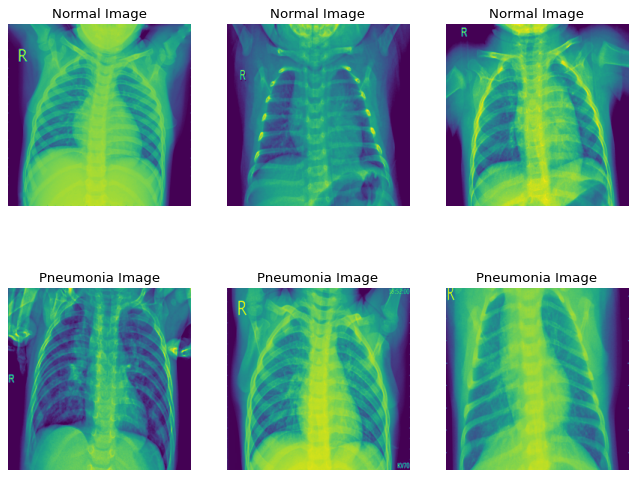

In [26]:
from glob import glob

train_normal_images = glob(train_norm + '/*')
train_pneumonia_images = glob(train_pneu + '/*')

plt.figure(figsize=(10, 8), dpi=80)
init_subplot = 230
for i in range(1, 7):
    plt.subplot(init_subplot + i)
    
    if i < 4:
        img = Image.open(np.random.choice(train_normal_images)).resize((244, 244))
        plt.title("Normal Image")
    else:
        img = Image.open(np.random.choice(train_pneumonia_images)).resize((244, 244))
        plt.title("Pneumonia Image")
        
    img = np.asarray(img)
    plt.axis('off')
    plt.imshow(img)

In [10]:
print(len(imgs_train_norm) + len(imgs_train_pneu))
print(len(imgs_test_norm) + len(imgs_test_pneu))
print(len(imgs_val_norm) + len(imgs_val_pneu))

5216
624
16


In [11]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

In [12]:
# get all the data in the directory chest_xray/test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir,
        #target_size = (244, 244),
        batch_size = 624) 

# get all the data in the directory split/validation (16 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir,
        #target_size = (244, 244),
        batch_size = 16)

# get all the data in the directory split/train (5216 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2).flow_from_directory(
        train_dir,
        #target_size = (244, 244),
        batch_size=5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5217 images belonging to 2 classes.


In [13]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [14]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 196608)
(624, 196608)
(16, 196608)


In [15]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [16]:
from keras import models
from keras import layers
np.random.seed(123)

In [18]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(.005),
                        input_shape=(256, 256,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [19]:
history = model.fit(train_images,
                    train_y,
                    steps_per_epoch=30,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_images, val_y))

Epoch 1/20
30/30 [==============================] - 25s 813ms/step - loss: 1.0703 - acc: 0.7083 - val_loss: 1.0953 - val_acc: 0.5000
Epoch 2/20
30/30 [==============================] - 24s 812ms/step - loss: 0.8648 - acc: 0.7458 - val_loss: 0.9866 - val_acc: 0.6250
Epoch 3/20
30/30 [==============================] - 25s 819ms/step - loss: 0.7770 - acc: 0.7854 - val_loss: 1.1936 - val_acc: 0.6250
Epoch 4/20
30/30 [==============================] - 24s 786ms/step - loss: 0.7921 - acc: 0.7958 - val_loss: 1.1024 - val_acc: 0.6250
Epoch 5/20
30/30 [==============================] - 23s 761ms/step - loss: 0.6754 - acc: 0.8500 - val_loss: 0.8915 - val_acc: 0.7500
Epoch 6/20
30/30 [==============================] - 23s 775ms/step - loss: 0.6658 - acc: 0.8292 - val_loss: 0.8804 - val_acc: 0.7500
Epoch 7/20
30/30 [==============================] - 23s 764ms/step - loss: 0.6991 - acc: 0.8062 - val_loss: 1.0495 - val_acc: 0.6250
Epoch 8/20
30/30 [==============================] - 23s 753ms/step - 

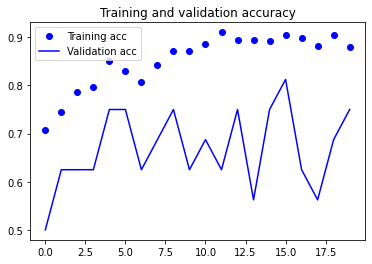

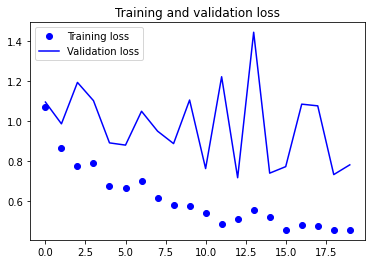

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [21]:
results_train = model.evaluate(train_images, train_y)

163/163 [==============================] - 64s 389ms/step - loss: 0.4143 - acc: 0.9114


In [22]:
results_test = model.evaluate(test_images, test_y)

20/20 [==============================] - 8s 382ms/step - loss: 0.5435 - acc: 0.8429


In [23]:
results_train

[0.41430777311325073, 0.9114263653755188]

In [24]:
results_test

[0.5434542894363403, 0.8429487347602844]